## Series temporales

Importación de librerías:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from datetime import datetime
from pandas import Series

# ignoramos los warnings
import warnings
warnings.filterwarnings('ignore')

Carga de datos:

In [47]:
df = pd.read_csv('maruti_stocks.csv')

Convertimos 'date' a 'datetime':

In [48]:
df_vwap = df[['Date', 'VWAP']]
df_vwap['Date'] = df_vwap['Date'].apply(pd.to_datetime)
df_vwap.set_index("Date", inplace=True)
df_vwap.head()

,VWAP
Date,
2003-07-09,165.95
2003-07-10,166.74
2003-07-11,172.45
2003-07-14,177.91
2003-07-15,176.88


In [ ]:
df_vwap.reset_index(inplace=True)
df_vwap['year'] = df_vwap.Date.dt.year
df_vwap['month'] = df_vwap.Date.dt.month
df_vwap['day'] = df_vwap.Date.dt.day
df_vwap['day of week'] = df_vwap.Date.dt.dayofweek

Ahora definiremos la columna de fecha como la columna índice:

In [49]:
df_vwap.set_index('Date', inplace=True)
df_vwap.head()

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,165.95,2003,7,9,2
2003-07-10,166.74,2003,7,10,3
2003-07-11,172.45,2003,7,11,4
2003-07-14,177.91,2003,7,14,0
2003-07-15,176.88,2003,7,15,1


### Time Resampling

El remuestreo temporal es una forma de agregar datos con respecto a un período de tiempo definido. Tenemos los datos de la cotización de las acciones para cada día, pero esto no tiene mucho sentido si queremos ver la tendencia de una institución financiera. Lo que es útil es la información agregada para cada mes o cada trimestre. Esto ayuda a la dirección a obtener una visión general instantánea y luego tomar decisiones basadas en esta visión general.
La librería de Pandas tiene una función resample() que remuestrea los datos de las series temporales. El método de remuestreo en pandas es similar a su método de agrupación, ya que esencialmente se agrupa por un lapso de tiempo específico.

Definimos rule = 'A' ya que queremos que sea anual y mean ya que lo que queremos es la media de los precios durante este periodo:

In [50]:
df_vwap.resample(rule='A').mean()[:5]

,VWAP,year,month,day,day of week
Date,,,,,
2003-12-31,266.608468,2003.0,9.604839,16.298387,2.016129
2004-12-31,430.522835,2004.0,6.559055,15.708661,2.047244
2005-12-31,494.328566,2005.0,6.541833,15.733068,2.000000
2006-12-31,845.582160,2006.0,6.552000,15.976000,2.056000
2007-12-31,887.107871,2007.0,6.554217,15.843373,1.987952


También podemos utilizar esta técnica para respresentar gráficos como el siguiente:

Text(0.5, 1.0, 'Yearly Mean VWAP for Maruti')

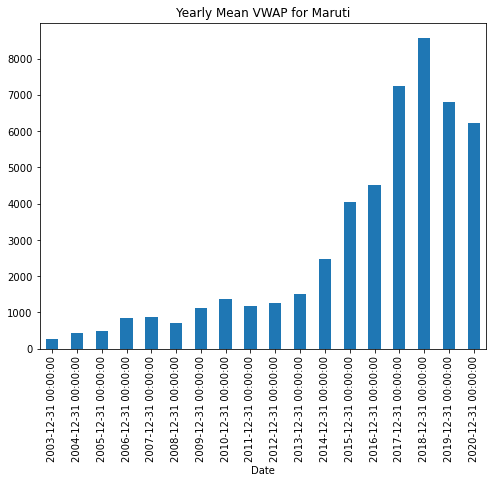

In [51]:
plt.rcParams['figure.figsize'] = (8, 6)
df_vwap['VWAP'].resample('A').mean().plot(kind='bar')
plt.title('Yearly Mean VWAP for Maruti')

El gráfico de barras de arriba corresponde al promedio del precio de cierre ajustado de _Maruti_ a fin de año.
También podemos representar el precio máximo mensual de apertura de _Maruti_:

Text(0.5, 1.0, 'Yearly start Mean VWAP for Maruti')

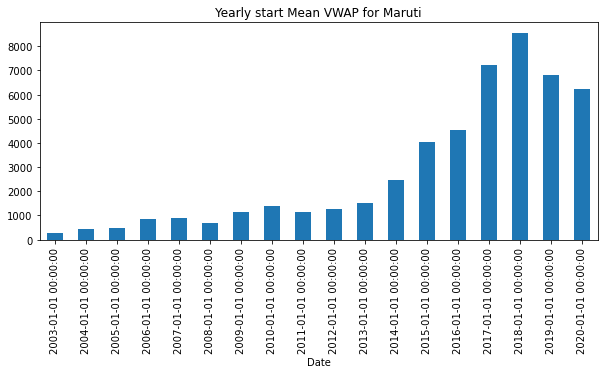

In [52]:
df_vwap['VWAP'].resample('AS').mean().plot(kind='bar', figsize=(10, 4))
plt.title('Yearly start Mean VWAP for Maruti')

### Time Shifting

A veces, es conveniente desplazar o mover los datos hacia adelante o hacia atrás en el tiempo. Este desplazamiento se realiza a lo largo de un índice temporal por el número deseado de incrementos de frecuencia de tiempo.

#### Desplazamiento hacia adelante

Para desplazar nuestros datos hacia adelante, pasaremos el número deseado de períodos (o incrementos) a través de la función _shift()_, que en este caso, debe ser un valor positivo. 

Si ahora avanzamos nuestros datos un período o índice, significa que todos los valores que antes correspondían a la fila N, ahora pertenecerán a la fila N+1. 

In [53]:
df_vwap.shift(1).head()

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,NaN,NaN,NaN,NaN,NaN
2003-07-10,165.95,2003.0,7.0,9.0,2.0
2003-07-11,166.74,2003.0,7.0,10.0,3.0
2003-07-14,172.45,2003.0,7.0,11.0,4.0
2003-07-15,177.91,2003.0,7.0,14.0,0.0


#### Desplazamiento hacia atrás

Para movernos en el tiempo en dirección contraria, es decir, volver al pasado en el tiempo, sería igual pero aplicando el signo negativo:

In [54]:
df_vwap.shift(-1).head()

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,166.74,2003.0,7.0,10.0,3.0
2003-07-10,172.45,2003.0,7.0,11.0,4.0
2003-07-11,177.91,2003.0,7.0,14.0,0.0
2003-07-14,176.88,2003.0,7.0,15.0,1.0
2003-07-15,177.59,2003.0,7.0,16.0,2.0


#### Desplazamiento basado en un código de cadena de tiempo

No necesariamente tenemos que movernos por año, mes o los períodos por defecto, sino que podemos aplicar los nuestros propios mediante la función _tshift()_ de pandas.
Sólo tenemos que pasar los parámetros de períodos y frecuencias. El atributo de período define el número de pasos que se deben desplazar, y los parámetros de frecuencia denotan el tamaño de esos pasos.

En el siguiente ejemplo queremos desplazar los datos tres meses adelante (futuro):

In [20]:
df_vwap.tshift(periods=3, freq='M').head()

,VWAP,year,month,day,day of week
Date,,,,,
2003-09-30,165.95,2003,7,9,2
2003-09-30,166.74,2003,7,10,3
2003-09-30,172.45,2003,7,11,4
2003-09-30,177.91,2003,7,14,0
2003-09-30,176.88,2003,7,15,1


### Rolling Windows

Los datos de las series temporales pueden ser ruidosos y, como resultado, se hace difícil medir la tendencia o patrón debido a las altas fluctuaciones. 

Por ejemplo, aquí está la visualización del precio VWAP de las acciones de _Maruti_ a lo largo de los años:

<AxesSubplot:xlabel='Date'>

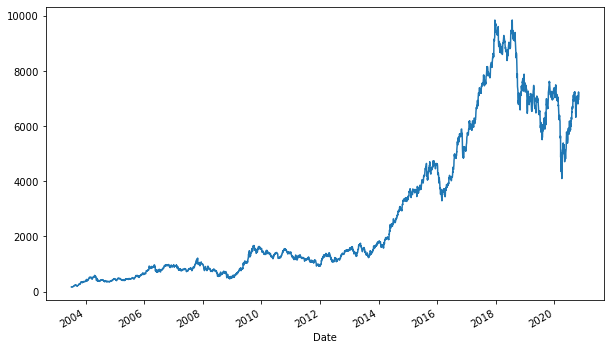

In [21]:
df_vwap['VWAP'].plot(figsize=(10, 6))

Hay bastante ruido en este gráfico porque estos son los datos diarios.
Sería mejor promediar esto en una semana, que es donde entra la media móvil. Una media móvil es un método de transformación que tiende a reducir el ruido de los datos.
Para este ejemplo, usaremos una media móvil de siete días:

In [22]:
df_vwap.rolling(7).mean().head(10)

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,NaN,NaN,NaN,NaN,NaN
2003-07-10,NaN,NaN,NaN,NaN,NaN
2003-07-11,NaN,NaN,NaN,NaN,NaN
2003-07-14,NaN,NaN,NaN,NaN,NaN
2003-07-15,NaN,NaN,NaN,NaN,NaN
2003-07-16,NaN,NaN,NaN,NaN,NaN
2003-07-17,173.285714,2003.0,7.0,13.142857,2.142857
2003-07-18,173.530000,2003.0,7.0,14.428571,2.428571
2003-07-21,173.520000,2003.0,7.0,16.000000,2.000000


Obviamente, los primeros 6 registros aparecen vacíos, puesto que no hay datos suficientes para hacer la media.

Gracias a la aplicación de la media móvil nuestros datos se vuelven mucho menos ruidosos y reflejan más la tendencia que los datos reales. 

¿Cómo podemos demostrarlo?
Para ver el cambio, podemos visualizar los datos originales y los datos aplicando medias móviles de 30 días en un mismo gráfico:

<AxesSubplot:xlabel='Date'>

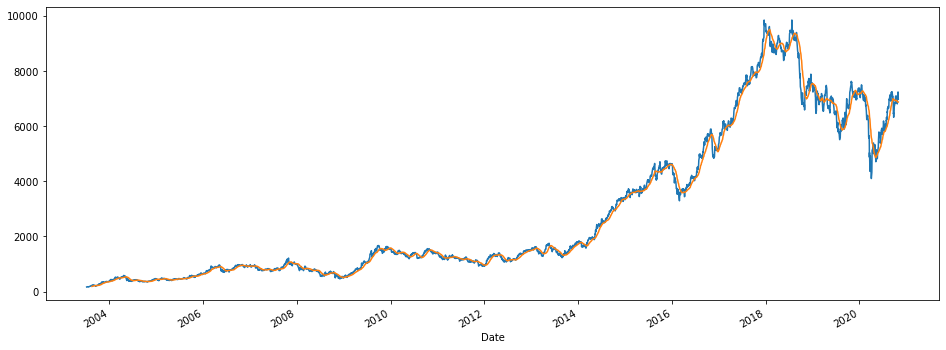

In [23]:
df_vwap['VWAP'].plot()
df_vwap.rolling(window=30).mean()['VWAP'].plot(figsize=(16, 6))

La línea azul es el dato original, mientras que la línea roja es la que cuenta con una media móvil de 30 días. Se puede ver vlaramente cómo la línea roja es mucho más suave y contiene menos ruido que la azul.

__¡Ojo!__ Un aspecto importante a tener en cuenta es que los primeros 29 días no van a tener esa línea naranja porque no hay suficientes datos para calcular la media móvil.

## Prophet

Prophet es una herramienta creada por Facebook que sirve para pronosticar datos de series temporales basado en un modelo aditivo en el que las tendencias no lineales se ajustan a la estacionalidad anual, semanal y diaria, además de los efectos vacacionales. 
Funciona mejor con series temporales que tienen fuertes efectos estacionales y varias estaciones de datos históricos. Prophet es robusto a los datos faltantes y a los cambios de tendencia, y maneja bastante bien los valores atípicos.

Con la finalidad de mostrar de lo que Prophet es capaz, se van a mostrar algunas de sus opciones y funcionalidades mediante distintos ejercicios.

Para empezar, veremos qué podemos conseguir con las funciones por defecto de Prophet:


##### Carga de librerías:

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

##### Carga de datos:

In [25]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv")

##### Ajuste del modelo

In [26]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


__¡Ojo a este aviso!__
Prophet ha detectado automaticamente una estacionalidad semanal, por ello, ha desactivado directamente la estacionalidad diaria.

In [27]:
# Hacemos un dataframe de fecha futura para los próximos 365 días.
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)  # Predicción del valor futuro.

##### Visualización de los resultados

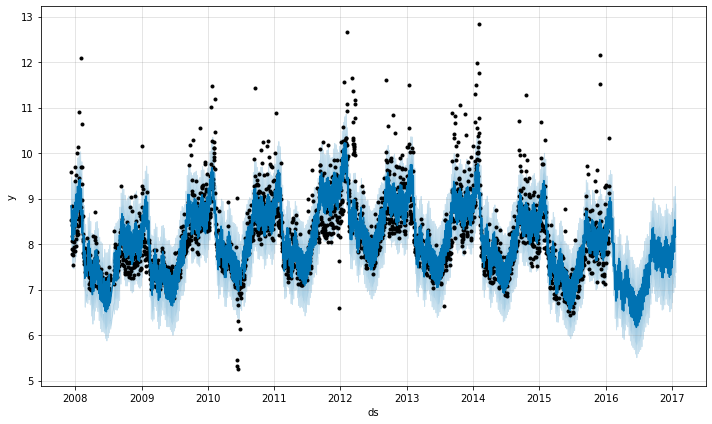

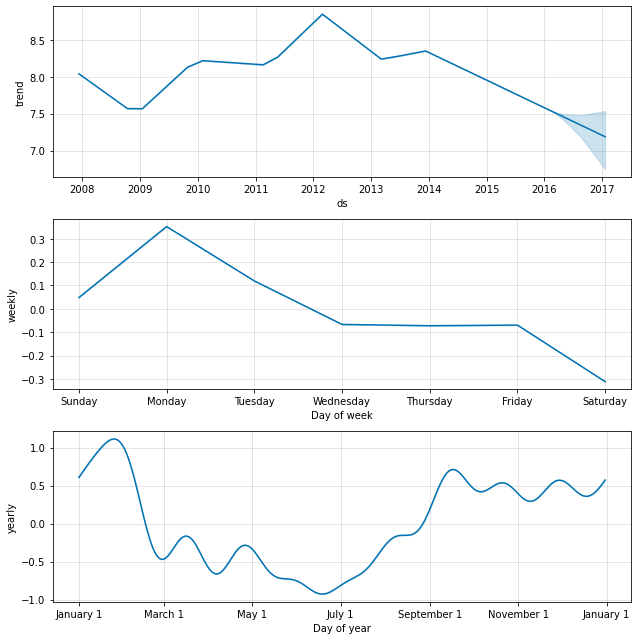

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.039129,8.247449,9.487863,8.039129,8.039129,0.802972,0.802972,0.802972,0.352288,0.352288,0.352288,0.450684,0.450684,0.450684,0.0,0.0,0.0,8.842101
1,2007-12-11,8.037591,7.968070,9.189453,8.037591,8.037591,0.553064,0.553064,0.553064,0.119634,0.119634,0.119634,0.433430,0.433430,0.433430,0.0,0.0,0.0,8.590655
2,2007-12-12,8.036053,7.769719,8.998678,8.036053,8.036053,0.350448,0.350448,0.350448,-0.066664,-0.066664,-0.066664,0.417112,0.417112,0.417112,0.0,0.0,0.0,8.386500
3,2007-12-13,8.034515,7.762504,8.979959,8.034515,8.034515,0.329912,0.329912,0.329912,-0.072261,-0.072261,-0.072261,0.402172,0.402172,0.402172,0.0,0.0,0.0,8.364426
4,2007-12-14,8.032977,7.711897,8.964312,8.032977,8.032977,0.319447,0.319447,0.319447,-0.069571,-0.069571,-0.069571,0.389018,0.389018,0.389018,0.0,0.0,0.0,8.352424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2017-01-15,7.190587,7.482455,8.933410,6.756197,7.535168,1.018043,1.018043,1.018043,0.048285,0.048285,0.048285,0.969757,0.969757,0.969757,0.0,0.0,0.0,8.208630
3266,2017-01-16,7.189564,7.780661,9.275557,6.753773,7.535471,1.344084,1.344084,1.344084,0.352288,0.352288,0.352288,0.991796,0.991796,0.991796,0.0,0.0,0.0,8.533648
3267,2017-01-17,7.188540,7.554203,8.943315,6.751349,7.535774,1.132525,1.132525,1.132525,0.119634,0.119634,0.119634,1.012891,1.012891,1.012891,0.0,0.0,0.0,8.321065
3268,2017-01-18,7.187516,7.406215,8.887940,6.748925,7.536078,0.966176,0.966176,0.966176,-0.066664,-0.066664,-0.066664,1.032840,1.032840,1.032840,0.0,0.0,0.0,8.153693


In [28]:
# Traza el ajuste de los datos pasados y las previsiones del futuro.
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)  # Desglose de los componentes.
plt.show()
forecast  # Resultados en formato de tabla

En Prophet existen opciones para controlar la incertidumbre o la tendencia. Algunas de estas opciones las veremos en el siguiente ejercicio:

In [29]:
from fbprophet.plot import add_changepoints_to_plot

##### Carga de datos:

In [30]:
# Load test data: log-transformed daily page views for the Wikipedia page for Peyton Manning.
df = pd.read_csv(
    "https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv")
df['cap'] = 10  # Saturating maximum
df['floor'] = 7  # Saturating minimum

##### Ajuste del modelo:

In [31]:
m = Prophet(growth='logistic')
m.add_country_holidays(country_name='US')  # Regresor vacacional en EEUU
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##### Generación de datos futuros:

In [32]:
future = m.make_future_dataframe(periods=365*5)
future['cap'] = 10  # Max
future['floor'] = 7  # Min

##### Predicción:

In [33]:
forecast = m.predict(future)

##### Visualización:

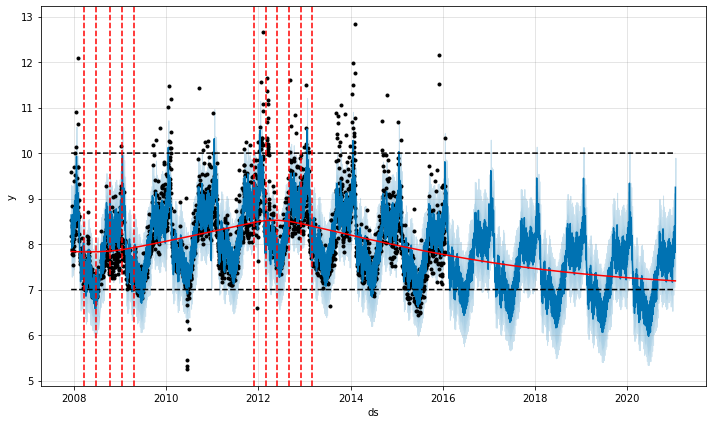

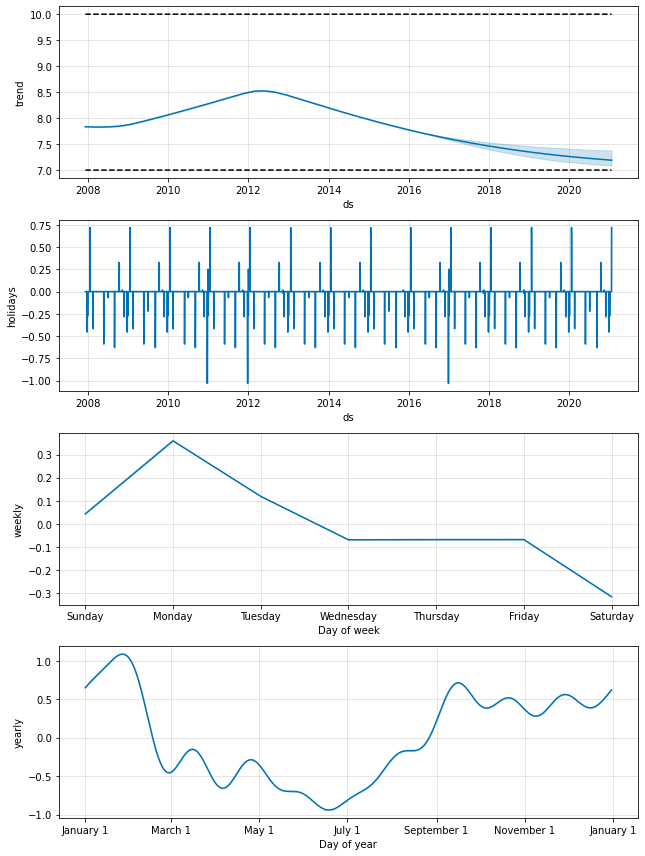

In [34]:
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)
plt.show()

Se puede observar que el gráfico ahora tiene la información de los "checkpoints" de comercio, y el comercio sigue la curva logística, aunque no se ve razonable aplicar la tendencia logística para los datos después de la transformación logarítmica. Observad que los gráficos de los componentes ahora también muestran el efecto vacacional.

### Opciones de estacionalidad

Prophet cuenta con muchas opciones para controlar la estacionalidad. A continuación, se explica un ejemplo utilizando la estacionalidad semanal:

##### Carga de datos:

In [35]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv")

In [36]:
def is_nfl_season(ds):
    date = pd.to_datetime(ds)
    return (date.month > 8 or date.month < 2)


# dentro de la estación (dummy).
df['on_season'] = df['ds'].apply(is_nfl_season)
# fuera de la estación (dummy).
df['off_season'] = ~df['ds'].apply(is_nfl_season)

##### Estacionalidad definida:

In [37]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='weekly_on_season', period=7,
                  fourier_order=3, condition_name='on_season')
m.add_seasonality(name='weekly_off_season', period=7,
                  fourier_order=3, condition_name='off_season')
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##### Creamos las mismas columnas para datos futuros:

In [38]:
future = m.make_future_dataframe(periods=365*5)
future['on_season'] = future['ds'].apply(is_nfl_season)
future['off_season'] = ~future['ds'].apply(is_nfl_season)

##### Predicción

In [39]:
forecast = m.predict(future)

##### Visualización de los resultados:

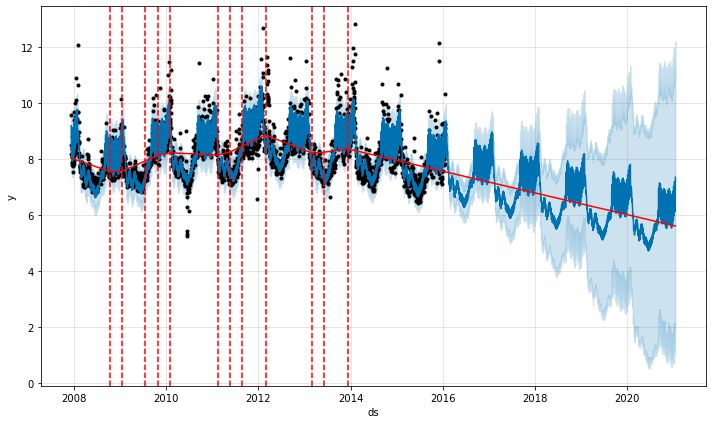

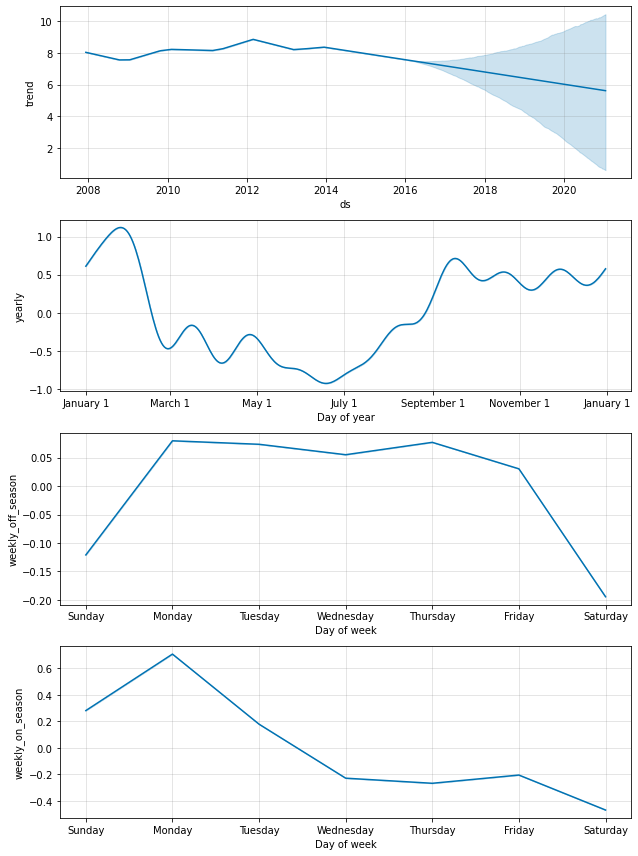

In [40]:
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)
plt.show()

Se puede ver la estacionalidad semanal en temporada y la estacionalidad semanal fuera de temporada. Tal y como se muestra, son muy distintas, lo que indica que vale la pena dividirlas).

### Diagnóstico de modelos

Prophet también permite introducir regresores (o variables explicativas). Sólo hay que añadir columnas para introducir los datos catuales y los futuros y usar 'add_regressor' para indicar al modelo cuáles debe introducir.

Por último, Prophet tiene muchas funciones útiles para hacer diagnósticos del modelo o validación cruzada así como extraer métricas que permitan un mejor análisis del modelo.

En el siguiente ejempo veremos cómo se haría la valiadación cruzada:

In [41]:
from IPython.display import display


from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import add_changepoints_to_plot, plot_cross_validation_metric

##### Carga de datos:

In [42]:
# Load test data: log-transformed daily page views for the Wikipedia page for Peyton Manning.
df = pd.read_csv(
    "https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv")

##### Ajuste del modelo:

In [43]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##### Validación cruzada:

In [44]:
# Execute cross validation
df_cv = cross_validation(m, initial='730 days',
                         period='180 days', horizon='365 days')
pm = performance_metrics(df_cv, rolling_window=0.1)
display(pm.head(), pm.tail())

INFO:fbprophet:Making 11 forecasts with cutoffs between 2010-02-15 00:00:00 and 2015-01-20 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,0.493693,0.702633,0.504486,0.058448,0.050018,0.687985
1,38 days,0.499514,0.706763,0.509472,0.059025,0.049767,0.685473
2,39 days,0.521729,0.722308,0.515571,0.059624,0.049950,0.682732
3,40 days,0.528980,0.727310,0.518398,0.059926,0.049462,0.683874
4,41 days,0.536406,0.732397,0.519356,0.060001,0.049767,0.691412


,horizon,mse,rmse,mae,mape,mdape,coverage
324,361 days,1.119252,1.057947,0.857551,0.102810,0.087224,0.509593
325,362 days,1.134672,1.065210,0.864200,0.103413,0.087720,0.510279
326,363 days,1.155966,1.075159,0.871703,0.104175,0.088177,0.507081
327,364 days,1.172290,1.082723,0.879306,0.105101,0.089167,0.503883
328,365 days,1.184865,1.088515,0.888204,0.106131,0.089370,0.497944


A continuación se muestran seis tipos diferentes de métricas por cada horizonte temporal tomando la media móvil de 37 días en este caso (podría cambiarse con la opción 'rolling_window').
Las métricas también pueden ser trazadas para que se pueda comprobar visualmente los cambios en los distintos horizontes temporales.


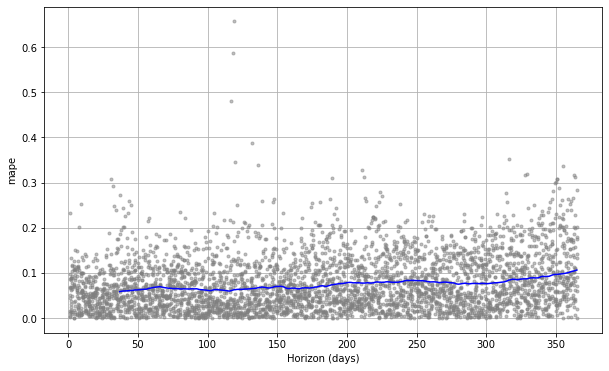

In [45]:
fig = plot_cross_validation_metric(df_cv, metric='mape', rolling_window=0.1)
plt.show()

#### ¿Qué NO podemos hacer con Prophet?

Prophet no permite por el momento la distribución de ruido no gaussiano. Es decir, para Prophet la distribución del ruido es siempre gaussiana y es la única manera de manejar los valores que siguen a la distribución sesgada.

Este es un tema que se discute activamente en el repositorio de Prophet GitHub: la posible personalización del código para permitir la distribución de Poisson y Binomial.

Prophet no tiene en cuenta la autocorrelación en el residual dado que la porción de ruido épsilon en la fórmula supone una distribución normal i.i.d., no se supone que el residuo tenga autocorrelación, a diferencia de otros modelos como el ARIMA.
